In [ ]:
# Task 01
import pandas as pd
import ast

df = pd.read_csv('/content/disease_features.csv')

# Parse stringified lists into actual Python lists and join into a string
def parse_and_join(text):
    try:
        items = ast.literal_eval(text)
        return " ".join(item.strip().lower().replace(" ", "_") for item in items if isinstance(item, str))
    except:
        return ""

for col in ['Risk Factors', 'Symptoms', 'Signs']:
    df[col + '_text'] = df[col].apply(parse_and_join)

df[['Disease', 'Risk Factors_text', 'Symptoms_text', 'Signs_text']].head()


Disease                                  Risk Factors_text  \
0  Acute Coronary Syndrome  hyperlipidemia hypertension smoking diabetes i...   
1    Adrenal Insufficiency  autoimmune_diseases genetic_predisposition inf...   
2                Alzheimer  age genetic_factors gender cardiovascular_heal...   
3        Aortic Dissection  hypertension atherosclerosis family_history hi...   
4                   Asthma  allergies family_history_of_asthma_or_allergie...   

                                       Symptoms_text  \
0  chest_pain sweating nausea vomiting palpitatio...   
1  fatigue muscle_weakness weight_loss gastrointe...   
2  cognitive_decline,_including_memory_loss_and_d...   
3  intense_chest_or_upper_back_pain sudden_severe...   
4  recurrent_episodes_of_wheezing breathlessness ...   

                                          Signs_text  
0                                                     
1  hyperpigmentation_(especially_in_creases_of_sk...  
2                                                     
3                                                     
4  observable_signs_during_a_physical_examination...

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
tfidf = TfidfVectorizer()

# Apply TF-IDF separately
tfidf_risk = tfidf.fit_transform(df['Risk Factors_text'])
tfidf_symptoms = tfidf.fit_transform(df['Symptoms_text'])
tfidf_signs = tfidf.fit_transform(df['Signs_text'])

# Combine the three matrices
from sklearn.preprocessing import normalize

tfidf_combined = hstack([tfidf_risk, tfidf_symptoms, tfidf_signs])
tfidf_combined = normalize(tfidf_combined)

print("TF-IDF Combined Matrix Shape:", tfidf_combined.shape)


TF-IDF Combined Matrix Shape: (25, 652)


In [ ]:
# Loading one-hot matrix
one_hot = pd.read_csv('/content/encoded_output2.csv')
one_hot_matrix = one_hot.drop(columns=['Disease'])

# Calculating => Sparsity = 1 - (non-zero elements / total elements)
def sparsity(matrix):
    non_zeros = matrix.nnz if hasattr(matrix, 'nnz') else (matrix != 0).sum().sum()
    total = matrix.shape[0] * matrix.shape[1]
    return 1 - non_zeros / total

print("🔍 TF-IDF Sparsity:", sparsity(tfidf_combined))
print("🔍 One-Hot Sparsity:", sparsity(one_hot_matrix))

print("🧬 Unique TF-IDF Features:", tfidf_combined.shape[1])
print("🧬 Unique One-Hot Features:", one_hot_matrix.shape[1])


🔍 TF-IDF Sparsity: 0.9514110429447853
🔍 One-Hot Sparsity: 0.9533870967741935
🧬 Unique TF-IDF Features: 652
🧬 Unique One-Hot Features: 496


In [ ]:
import pandas as pd

df = pd.read_csv('/content/disease_features.csv')

def categorize_disease(name):
    name = name.lower()
    if any(keyword in name for keyword in ["stroke", "alzheimer", "epilepsy", "parkinson", "brain", "sclerosis", "migraine"]):
        return "Neurological"
    elif any(keyword in name for keyword in ["asthma", "copd", "respiratory", "lung", "pneumonia"]):
        return "Respiratory"
    elif any(keyword in name for keyword in ["heart", "cardio", "coronary", "atrial", "aortic", "hypertension"]):
        return "Cardiovascular"
    elif any(keyword in name for keyword in ["renal", "kidney", "nephropathy"]):
        return "Renal"
    elif any(keyword in name for keyword in ["diabetes", "insulin", "glucose"]):
        return "Endocrine"
    elif any(keyword in name for keyword in ["hepatitis", "liver", "cirrhosis"]):
        return "Hepatic"
    elif any(keyword in name for keyword in ["gastritis", "ulcer", "gi", "gastro", "colitis"]):
        return "Gastrointestinal"
    elif any(keyword in name for keyword in ["infection", "tuberculosis", "hiv", "viral", "bacterial"]):
        return "Infectious"
    else:
        return "Other"

df['Category'] = df['Disease'].apply(categorize_disease)
df[['Disease', 'Category']].to_csv('/content/disease_category_mapping.csv', index=False)

from google.colab import files
files.download('/content/disease_category_mapping.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Task 2
import pandas as pd
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from scipy.sparse import hstack

df_features = pd.read_csv('/content/disease_features.csv')
df_onehot = pd.read_csv('/content/encoded_output2.csv')

def parse_and_join(text):
    try:
        items = ast.literal_eval(text)
        return " ".join(item.strip().lower().replace(" ", "_") for item in items if isinstance(item, str))
    except:
        return ""

for col in ['Risk Factors', 'Symptoms', 'Signs']:
    df_features[col + '_text'] = df_features[col].apply(parse_and_join)

# Apply TF-IDF vectorization
tfidf = TfidfVectorizer()
tfidf_risk = tfidf.fit_transform(df_features['Risk Factors_text'])
tfidf_symptoms = tfidf.fit_transform(df_features['Symptoms_text'])
tfidf_signs = tfidf.fit_transform(df_features['Signs_text'])

tfidf_combined = normalize(hstack([tfidf_risk, tfidf_symptoms, tfidf_signs]))


In [ ]:
# Apply PCA and Truncated SVD to reduce both TF-IDF and one-hot encoded matrices to 2D

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler

# Prepare and scale one-hot matrix
one_hot_matrix = df_onehot.drop(columns=['Disease'])
scaler = StandardScaler()
one_hot_scaled = scaler.fit_transform(one_hot_matrix)

# PCA and SVD for one-hot matrix
pca_onehot = PCA(n_components=2)
onehot_pca_result = pca_onehot.fit_transform(one_hot_scaled)

svd_onehot = TruncatedSVD(n_components=2)
onehot_svd_result = svd_onehot.fit_transform(one_hot_matrix)

# PCA and SVD for TF-IDF matrix
pca_tfidf = PCA(n_components=2)
tfidf_pca_result = pca_tfidf.fit_transform(tfidf_combined.toarray())

svd_tfidf = TruncatedSVD(n_components=2)
tfidf_svd_result = svd_tfidf.fit_transform(tfidf_combined)


In [ ]:
# Print explained variance ratios for each reduction method

explained_variance = {
    "PCA_OneHot": pca_onehot.explained_variance_ratio_,
    "SVD_OneHot": svd_onehot.explained_variance_ratio_,
    "PCA_TFIDF": pca_tfidf.explained_variance_ratio_,
    "SVD_TFIDF": svd_tfidf.explained_variance_ratio_,
}

for method, values in explained_variance.items():
    print(f"{method}: Component 1 = {values[0]:.4f}, Component 2 = {values[1]:.4f}")



PCA_OneHot: Component 1 = 0.1081, Component 2 = 0.0920
SVD_OneHot: Component 1 = 0.0225, Component 2 = 0.0920
PCA_TFIDF: Component 1 = 0.0521, Component 2 = 0.0469
SVD_TFIDF: Component 1 = 0.0145, Component 2 = 0.0446


In [ ]:
# Load Disease -> Category mapping and merge with feature dataframe

df_categories = pd.read_csv('/content/disease_category_mapping.csv')  # adjust path if needed
df_features = df_features.merge(df_categories, on='Disease', how='left')


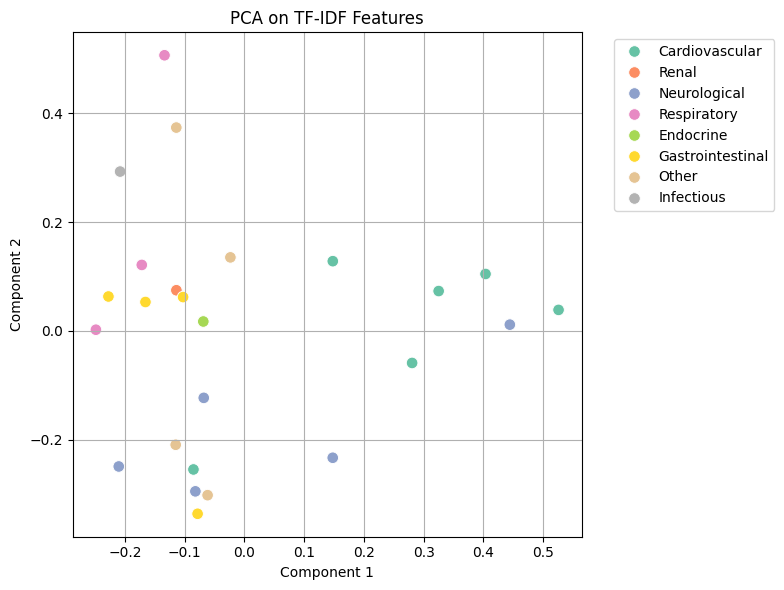

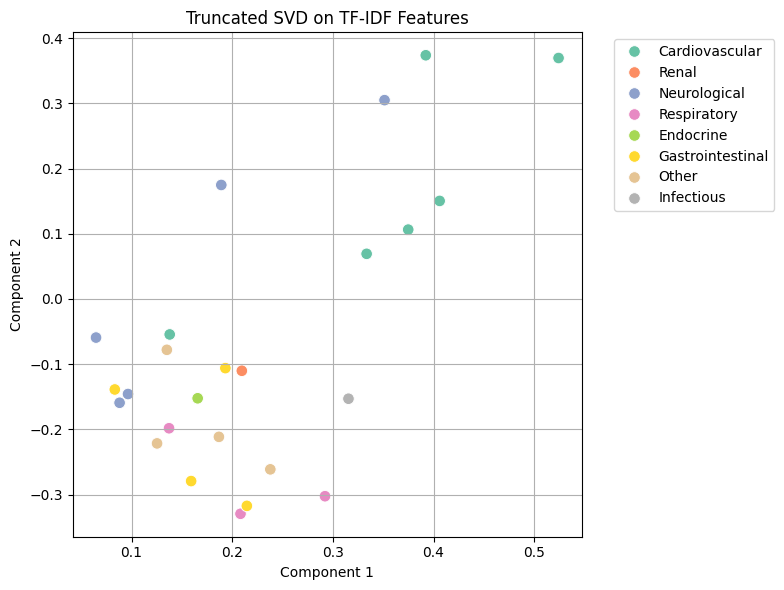

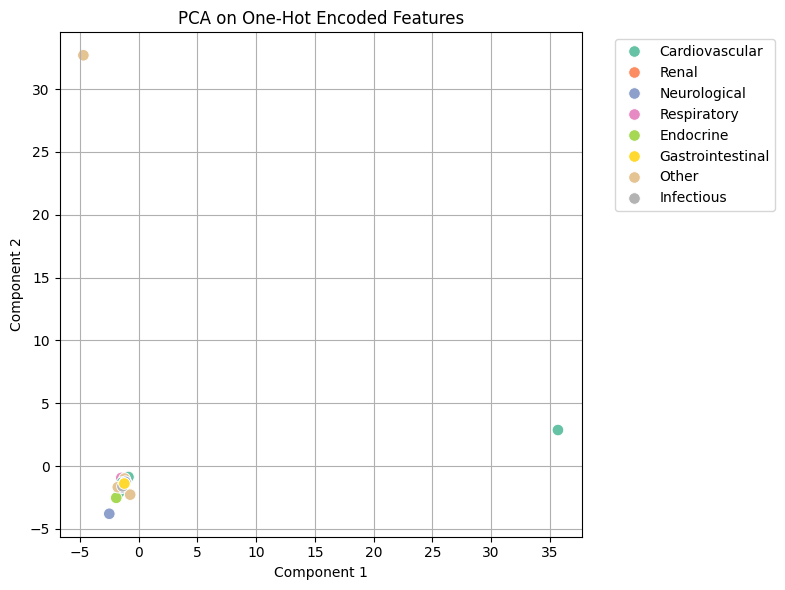

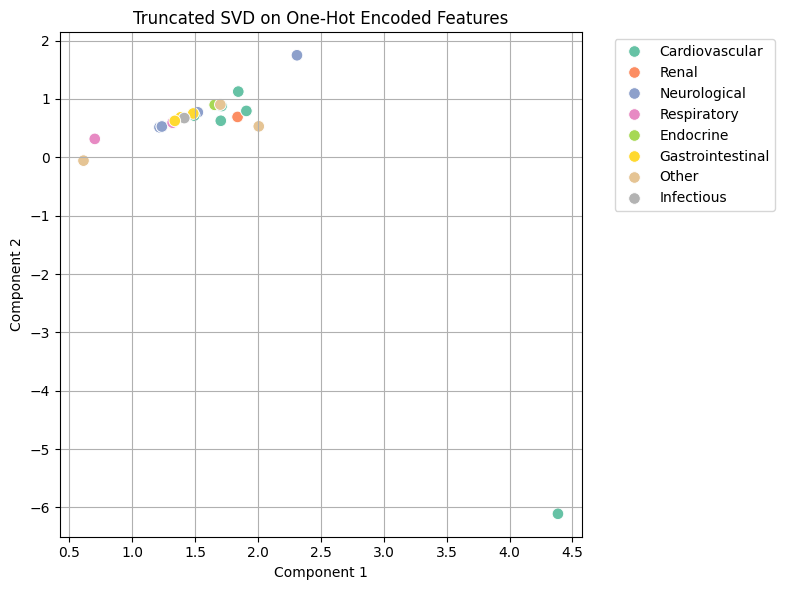

In [ ]:
# Plot 2D PCA and SVD results with full disease categories

import matplotlib.pyplot as plt
import seaborn as sns

def plot_2d(data, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette="Set2", s=70)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plots
plot_2d(tfidf_pca_result, df_features['Category'], "PCA on TF-IDF Features")
plot_2d(tfidf_svd_result, df_features['Category'], "Truncated SVD on TF-IDF Features")
plot_2d(onehot_pca_result, df_features['Category'], "PCA on One-Hot Encoded Features")
plot_2d(onehot_svd_result, df_features['Category'], "Truncated SVD on One-Hot Encoded Features")


In [ ]:
# Task 3
# Set up feature matrices and classification labels

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics.pairwise import manhattan_distances, cosine_distances
import numpy as np

X_tfidf = tfidf_combined
X_onehot = df_onehot.drop(columns=['Disease']).values
y = df_features['Category'].values


In [ ]:
# Define KNN with custom distance metrics

from sklearn.base import BaseEstimator, ClassifierMixin

class KNNWithCustomDistance(BaseEstimator, ClassifierMixin):
    def __init__(self, k=3, metric='euclidean'):
        self.k = k
        self.metric = metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self

    def predict(self, X):
        if self.metric == 'euclidean':
            dists = np.linalg.norm(self.X_train[None, :, :] - X[:, None, :], axis=2)
        elif self.metric == 'manhattan':
            dists = manhattan_distances(X, self.X_train)
        elif self.metric == 'cosine':
            dists = cosine_distances(X, self.X_train)
        else:
            raise ValueError("Unsupported metric")
        indices = np.argsort(dists, axis=1)[:, :self.k]
        top_k_labels = self.y_train[indices]
        preds = [np.bincount(labels).argmax() for labels in top_k_labels]
        return np.array(preds)


In [ ]:
# Evaluate KNN on filtered data with encoded labels and safe CV

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Encode labels as integers for bincount()
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
category_counts = pd.Series(y_encoded).value_counts()
valid_labels = category_counts[category_counts >= 5].index
mask = pd.Series(y_encoded).isin(valid_labels)

# Filter all matrices and labels
X_tfidf_filtered = X_tfidf[mask]
X_onehot_filtered = X_onehot[mask]
y_filtered = y_encoded[mask]

# Updated KNN class to handle sparse input
class KNNWithCustomDistance(BaseEstimator, ClassifierMixin):
    def __init__(self, k=3, metric='euclidean'):
        self.k = k
        self.metric = metric

    def fit(self, X, y):
        self.X_train = X.toarray() if hasattr(X, "toarray") else X
        self.y_train = y
        return self

    def predict(self, X):
        X = X.toarray() if hasattr(X, "toarray") else X
        if self.metric == 'euclidean':
            dists = np.linalg.norm(self.X_train[None, :, :] - X[:, None, :], axis=2)
        elif self.metric == 'manhattan':
            dists = manhattan_distances(X, self.X_train)
        elif self.metric == 'cosine':
            dists = cosine_distances(X, self.X_train)
        else:
            raise ValueError("Unsupported metric")
        indices = np.argsort(dists, axis=1)[:, :self.k]
        top_k_labels = self.y_train[indices]
        preds = [np.bincount(labels).argmax() for labels in top_k_labels]
        return np.array(preds)

# Loop through encodings, k-values, and distance metrics
k_values = [3, 5, 7]
metrics = ['euclidean', 'manhattan', 'cosine']
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results_knn = []

for encoding_name, X in [('TF-IDF', X_tfidf_filtered), ('One-Hot', X_onehot_filtered)]:
    for metric in metrics:
        for k in k_values:
            model = KNNWithCustomDistance(k=k, metric=metric)
            preds = cross_val_predict(model, X, y_filtered, cv=cv)
            report = classification_report(y_filtered, preds, output_dict=True, zero_division=0)
            results_knn.append({
                'Encoding': encoding_name,
                'Model': 'KNN',
                'k': k,
                'Distance': metric,
                'Accuracy': report['accuracy'],
                'Precision': np.mean([v['precision'] for k, v in report.items() if k != 'accuracy']),
                'Recall': np.mean([v['recall'] for k, v in report.items() if k != 'accuracy']),
                'F1': np.mean([v['f1-score'] for k, v in report.items() if k != 'accuracy']),
            })

# Display results
df_knn_results = pd.DataFrame(results_knn)
df_knn_results.sort_values(by='F1', ascending=False).reset_index(drop=True)


Encoding Model  k   Distance  Accuracy  Precision    Recall        F1
0   One-Hot   KNN  5     cosine  0.909091   0.918561  0.914773  0.909091
1   One-Hot   KNN  3     cosine  0.909091   0.926948  0.902273  0.906371
2   One-Hot   KNN  5  manhattan  0.818182   0.860390  0.829545  0.816288
3   One-Hot   KNN  5  euclidean  0.818182   0.860390  0.829545  0.816288
4   One-Hot   KNN  7     cosine  0.727273   0.731737  0.719318  0.719114
5   One-Hot   KNN  3  euclidean  0.636364   0.782828  0.659091  0.604708
6   One-Hot   KNN  3  manhattan  0.636364   0.782828  0.659091  0.604708
7    TF-IDF   KNN  7  euclidean  0.636364   0.795455  0.609091  0.546402
8    TF-IDF   KNN  7     cosine  0.636364   0.795455  0.609091  0.546402
9   One-Hot   KNN  7  euclidean  0.454545   0.451136  0.451136  0.451136
10  One-Hot   KNN  7  manhattan  0.454545   0.451136  0.451136  0.451136
11   TF-IDF   KNN  7  manhattan  0.454545   0.418561  0.438636  0.414367
12   TF-IDF   KNN  5  euclidean  0.545455   0.278926  0.511364  0.360963
13   TF-IDF   KNN  3  euclidean  0.545455   0.278926  0.511364  0.360963
14   TF-IDF   KNN  3     cosine  0.545455   0.278926  0.511364  0.360963
15   TF-IDF   KNN  5     cosine  0.545455   0.278926  0.511364  0.360963
16   TF-IDF   KNN  3  manhattan  0.545455   0.278926  0.511364  0.360963
17   TF-IDF   KNN  5  manhattan  0.545455   0.278926  0.511364  0.360963

In [ ]:
#  Train Logistic Regression on both encodings using 5-fold cross-validation

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

results_lr = []

for encoding_name, X in [('TF-IDF', X_tfidf_filtered), ('One-Hot', X_onehot_filtered)]:
    model = LogisticRegression(max_iter=1000)
    preds = cross_val_predict(model, X, y_filtered, cv=cv)
    report = classification_report(y_filtered, preds, output_dict=True, zero_division=0)
    results_lr.append({
        'Encoding': encoding_name,
        'Model': 'Logistic Regression',
        'Accuracy': report['accuracy'],
        'Precision': np.mean([v['precision'] for k, v in report.items() if k != 'accuracy']),
        'Recall': np.mean([v['recall'] for k, v in report.items() if k != 'accuracy']),
        'F1': np.mean([v['f1-score'] for k, v in report.items() if k != 'accuracy']),
    })

# Display results
df_lr_results = pd.DataFrame(results_lr)
df_lr_results


Encoding                Model  Accuracy  Precision    Recall        F1
0   TF-IDF  Logistic Regression  0.636364   0.795455  0.609091  0.546402
1  One-Hot  Logistic Regression  0.818182   0.860390  0.829545  0.816288

In [ ]:
# Combine KNN and Logistic Regression results into one final table

final_results = pd.concat([df_knn_results, df_lr_results], ignore_index=True)

# Fill NaNs for Logistic Regression (which doesn't use k or distance)
final_results['k'] = final_results['k'].fillna('-')
final_results['Distance'] = final_results['Distance'].fillna('-')

# Sort by F1-score descending
final_results_sorted = final_results.sort_values(by='F1', ascending=False).reset_index(drop=True)

# Show the top results
import pandas as pd
from IPython.display import display
display(final_results_sorted)


Encoding                Model    k   Distance  Accuracy  Precision  \
0   One-Hot                  KNN  5.0     cosine  0.909091   0.918561   
1   One-Hot                  KNN  3.0     cosine  0.909091   0.926948   
2   One-Hot  Logistic Regression    -          -  0.818182   0.860390   
3   One-Hot                  KNN  5.0  euclidean  0.818182   0.860390   
4   One-Hot                  KNN  5.0  manhattan  0.818182   0.860390   
5   One-Hot                  KNN  7.0     cosine  0.727273   0.731737   
6   One-Hot                  KNN  3.0  manhattan  0.636364   0.782828   
7   One-Hot                  KNN  3.0  euclidean  0.636364   0.782828   
8    TF-IDF  Logistic Regression    -          -  0.636364   0.795455   
9    TF-IDF                  KNN  7.0     cosine  0.636364   0.795455   
10   TF-IDF                  KNN  7.0  euclidean  0.636364   0.795455   
11  One-Hot                  KNN  7.0  euclidean  0.454545   0.451136   
12  One-Hot                  KNN  7.0  manhattan  0.454545   0.451136   
13   TF-IDF                  KNN  7.0  manhattan  0.454545   0.418561   
14   TF-IDF                  KNN  3.0  euclidean  0.545455   0.278926   
15   TF-IDF                  KNN  5.0  euclidean  0.545455   0.278926   
16   TF-IDF                  KNN  3.0  manhattan  0.545455   0.278926   
17   TF-IDF                  KNN  3.0     cosine  0.545455   0.278926   
18   TF-IDF                  KNN  5.0     cosine  0.545455   0.278926   
19   TF-IDF                  KNN  5.0  manhattan  0.545455   0.278926   

      Recall        F1  
0   0.914773  0.909091  
1   0.902273  0.906371  
2   0.829545  0.816288  
3   0.829545  0.816288  
4   0.829545  0.816288  
5   0.719318  0.719114  
6   0.659091  0.604708  
7   0.659091  0.604708  
8   0.609091  0.546402  
9   0.609091  0.546402  
10  0.609091  0.546402  
11  0.451136  0.451136  
12  0.451136  0.451136  
13  0.438636  0.414367  
14  0.511364  0.360963  
15  0.511364  0.360963  
16  0.511364  0.360963  
17  0.511364  0.360963  
18  0.511364  0.360963  
19  0.511364  0.360963